In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [3]:
include("../src/likelihood.jl")
include("../src/utill.jl")

corner_plots (generic function with 1 method)

In [4]:
conv_mat = load("../data/experiment/dataset_2/m2/conv-matrix-upd-1.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"],
);


In [5]:
# images = load("../data/experiment/dataset_2/m2/images.jld2");

# event_number = 1

# event = (
#     cam_1 = images["cam_1"][event_number,:,:],
#     cam_2 = images["cam_2"][event_number,:,:],
#     cam_3 = images["cam_3"][event_number,:,:],
#     cam_4 = images["cam_4"][event_number,:,:],
#     population = images["charge"][event_number,:][1],
# )

param_truth = (
        tr_size = [0.14, 0.16],
        ang_spr = [3.8, 4.2],
        waist = [2.9,],
        algmx = [32,32,22,39], 
        algmy = [38,38,25,32], 
        resx = [2.07,1.95,1.13], 
        resy = [2.07,1.95,1.13], 
        cam4_resx = 1.16,
        cam4_resy = 1.,
        psx = [0.0271,0.0216,0.114], 
        psy = [0.0305,0.0234,0.125],
        cam4_psx = 3*0.0303,
        cam4_psy = 3*0.0298,
        cam4_ped = 10,
        cam4_light_fluct = 2.0,
        cam4_light_amp = 33406.9,
        light_amp  = [35147.44, 50235.06, 10096.64],
        s_cam = [0.0, 1.478, 15.026, 23.1150], 
    );


In [6]:
event = generate_event(param_truth, 26.8, conv_matrices)

(cam_1 = [6.0 4.0 … 72.0 3.0; 280.0 2.0 … 10.0 0.0; … ; 7.0 1.0 … 3.0 7.0; 1.0 12.0 … 3.0 2.0], cam_2 = [3.0 2.0 … 3.0 6.0; 1.0 2.0 … 1.0 0.0; … ; 2.0 1.0 … 1.0 1.0; 4.0 2.0 … 2.0 8.0], cam_3 = [1.0 122.0 … 7.0 2.0; 136.0 9.0 … 291.0 1.0; … ; 4.0 2.0 … 10.0 146.0; 0.0 5.0 … 2.0 26.0], cam_4 = [12.0 19.0 … 4.0 10.0; 4.0 13.0 … 2.0 12.0; … ; 10.0 16.0 … 19.0 8.0; 11.0 18.0 … 8.0 5.0], population = 26.8)

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(7,7))
# fig.subplots_adjust(hspace=0.2, wspace=0.2)

# ax[1,1].pcolormesh(event[1], vmin=0, vmax=2^12, cmap="RdYlBu_r")
# ax[1,2].pcolormesh(event[2], vmin=0, vmax=2^12, cmap="RdYlBu_r")
# ax[2,1].pcolormesh(event[3], vmin=0, vmax=2^12, cmap="RdYlBu_r")
# ax[2,2].pcolormesh(event[4], vmin=0, vmax=2^12, cmap="RdYlBu_r")

# fig, ax = plt.subplots(4,2, figsize=(7,10))

# ax[1].plot(event[1][35,:])
# ax[1].plot(simulated_event[1][35,:])

# ax[2].plot(event[2][35,:])
# ax[2].plot(simulated_event[2][35,:])

# ax[3].plot(event[3][20,:])
# ax[3].plot(simulated_event[3][20,:])

# ax[4].plot(event[4][35,:])
# ax[4].plot(simulated_event[4][35,:])

# ax[5].plot(event[1][:,35])
# ax[5].plot(simulated_event[1][:,35])

# ax[6].plot(event[2][:,35])
# ax[6].plot(simulated_event[2][:,35])

# ax[7].plot(event[3][:,20])
# ax[7].plot(simulated_event[3][:,20])

# ax[8].plot(event[4][:,35])
# ax[8].plot(simulated_event[4][:,35])

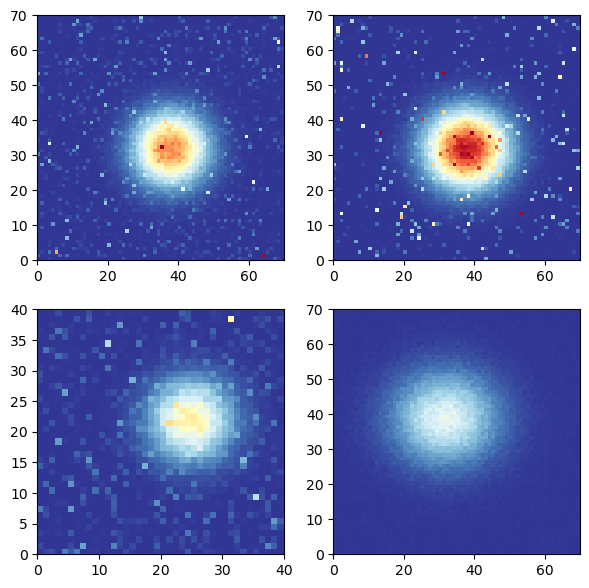

PyObject <matplotlib.collections.QuadMesh object at 0x7fe738f1bc10>

In [7]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event[1], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event[2], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event[3], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event[4], vmin=0, vmax=2^12, cmap="RdYlBu_r")

# MCMC with simulated event

In [ ]:

# function likelihood_cam4_debug(
#         params::T, 
#         image::Array{Float64,2},
#         population::Float64,
#         cam_ind::Int64;
#         size = size(event.cam_4)
#     ) where {T <: NamedTuple}
   
#     tot_loglik = zeros(Float64, size...)   
#     light_coefficient::Float64 = population*params.cam4_light_amp
    
#     δ_x::Float64 = params.cam4_psx
#     δ_y::Float64 = params.cam4_psy
    
#     μ_x::Float64  = params.algmx[cam_ind] * δ_x
#     μ_y::Float64  = params.algmy[cam_ind] * δ_y
    
#     σ_x::Float64 = sqrt.(params.tr_size[1]^2 + 10^-4*params.ang_spr[1]^2*(params.waist[1] - params.s_cam[cam_ind])^2) 
#     σ_y::Float64 = sqrt.(params.tr_size[2]^2 + 10^-4*params.ang_spr[2]^2*(params.waist[1] - params.s_cam[cam_ind])^2) 
    
#     σ_x = sqrt(σ_x^2 + (params.cam4_resx*δ_x).^2)
#     σ_y = sqrt(σ_y^2 + (params.cam4_resy*δ_y).^2)
    

#     for pix_ind in CartesianIndices(tot_loglik)
        
#         x_edge::Float64 = pix_ind.I[1] * δ_x
#         y_edge::Float64 = pix_ind.I[2] * δ_y

#         pix_prediction::Float64 = cdf(Normal(μ_x,σ_x), x_edge) - cdf(Normal(μ_x,σ_x), x_edge - δ_x)
#         pix_prediction *= cdf(Normal(μ_y,σ_y), y_edge) - cdf(Normal(μ_y,σ_y), y_edge - δ_y)
#         pix_prediction = pix_prediction*light_coefficient + params.cam4_ped
#         cum_log_lik = log(pdf(truncated(Normal(pix_prediction, params.cam4_light_fluct*sqrt(pix_prediction)), 0.0, Inf), image[pix_ind]))

#         tot_loglik[pix_ind] = cum_log_lik
#     end

#     return tot_loglik
# end

# param_test = (
#         tr_size = [0.10, 0.2],
#         ang_spr = [3.8, 4.2],
#         waist = [2.3,],
#         algmx = [32,32,22,42], 
#         algmy = [38,38,25,32], 
#         resx = [2.07,1.95,1.13], 
#         resy = [2.07,1.95,1.13], 
#         cam4_resx = 2.16,
#         cam4_resy = 1.,
#         psx = [0.0271,0.0216,0.114], 
#         psy = [0.0305,0.0234,0.125],
#         cam4_psx = 3*0.0303,
#         cam4_psy = 3*0.0298,
#         cam4_ped = 10,
#         cam4_light_fluct = 1.0,
#         cam4_light_amp = 35406.9,
#         light_amp  = [35147.44, 50235.06, 10096.64],
#         s_cam = [0.0, 1.478, 15.026, 23.1150], 
#     );


# cont = likelihood_cam4_debug(param_test, event.cam_4, event.population, 4)

# plt.pcolormesh(cont)

In [8]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
log_likelihood = let e = event, c = conv_matrices
    
    params -> begin
        
        ll = zero(Float64)
        
        ll += likelihood_cam13(params, e.cam_1, e.population, c.cam_1, 1)
        ll += likelihood_cam13(params, e.cam_2, e.population, c.cam_2, 2)
        ll += likelihood_cam13(params, e.cam_3, e.population, c.cam_3, 3)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4)

        return LogDVal(ll)
        
    end
end

log_likelihood

In [9]:
prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.08, 0.25), truncated(Normal(0.2, 0.04), 0.08, 0.25)],
        ang_spr = [truncated(Normal(4, 2), 2, 6), truncated(Normal(4, 2), 2, 6)], # change prior range
        waist = [Normal(2.9, 0.03)],
        algmx = [23 .. 48, 23 .. 48, 10 .. 30, 23 .. 48],
        algmy = [23 .. 48, 23 .. 48, 10 .. 30, 23 .. 48],
        resx = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        resy = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        cam4_resx = truncated(Normal(1, 0.5), 0, Inf),
        cam4_resy = truncated(Normal(1, 0.5), 0, Inf),
        psx = [0.0271,0.0216,0.114], 
        psy = [0.0305,0.0234,0.125],
        cam4_psx = 3*0.0303,
        cam4_psy = 3*0.0298,
        cam4_ped = 0 .. 20,
        cam4_light_fluct = 1.0 .. 3. ,
        cam4_light_amp = 30000 .. 35000,
        light_amp  = [35147.44, 50235.06, 10096.64],
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    );


In [10]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMetropolisTuning(
    λ = 0.5,
    α = 0.15..0.25,
    β = 1.5,
    c = 1e-4..1e2,
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCInitStrategy(
    init_tries_per_chain = 100..150,
    max_nsamples_init = 500,
    max_nsteps_init = 500,
    max_time_init = Inf
)

burnin = MCMCBurninStrategy(
    max_nsamples_per_cycle = 1000,
    max_nsteps_per_cycle = 1000,
    max_time_per_cycle = Inf,
    max_ncycles = 100
);

algorithm = MetropolisHastings();

In [11]:
nsamples = 6*10^4
nchains = 4

4

In [ ]:
@time samples = bat_sample(
    posterior, (nsamples, nchains), algorithm,
    max_nsteps = nsamples,
    max_time = Inf,
    tuning = tuning,
    init = init,
    burnin = burnin,
    convergence = convergence,
    strict = false,
    filter = true
).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ I

In [ ]:
size(flatview(unshaped.(samples.v)))

In [ ]:
mode(samples)[1]

In [ ]:
dims = [1,2,3,4,5,]
names = [L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", "s", "6", "7", "8", "9"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [ ]:
dims = [6,7,8,9,10,11,12, 13]
names = ["6", "7", "8", "9", "10", "11", "12", "13"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [ ]:
dims = [14,15,16,17,18,19,20,21]
names = [14,15,16,17,18,19,20,21]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [ ]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_crossections(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

In [ ]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_integral(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

In [ ]:
params_array = [param_truth, mode(samples)[1], mean(samples)[1]]
colors_array = ["gray", "C0", "C1"]
labels_array = ["Truth", "Mode", "Mean"]

plot_envelop_trajectory(params_array,  labels = labels_array, colors=colors_array)